<a href="https://colab.research.google.com/github/aljeshishe/colab/blob/main/okama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/01%20howto.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

You can run the code examples in [Google Colab](https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/01%20howto.ipynb).

**To install the package:**

In [ ]:
!pip install -U okama plotly

import okama and matplotlib packages ...

In [ ]:
import okama as ok
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.0, 6.0]
pd.options.plotting.backend = 'plotly'

In [ ]:
ok.search('lkoh')

,symbol,ticker,name,country,exchange,currency,type,isin
0,LKOH.LSE,LKOH,PJSC LUKOIL,UK,LSE,USD,Common Stock,RU0009024277
1,LKOH.MOEX,LKOH,PJSC LUKOIL,Russia,MOEX,RUB,Common Stock,RU0009024277


In [ ]:
ok.Asset('FIVE.MOEX')

symbol                     FIVE.MOEX
name             X5 Retail Group N.V
country                       Russia
exchange                        MOEX
currency                         RUB
type                    Common Stock
first date                   2018-03
last date                    2021-11
period length                   3.70
dtype: object

In [ ]:
ok.Asset('FIVE.MOEX').dividends.tail(50)

Date
2018-05    1.2654
2018-06    0.0000
2018-07    0.0000
2018-08    0.0000
2018-09    0.0000
2018-10    0.0000
2018-11    0.0000
2018-12    0.0000
2019-01    0.0000
2019-02    0.0000
2019-03    0.0000
2019-04    0.0000
2019-05    1.4078
2019-06    0.0000
2019-07    0.0000
2019-08    0.0000
2019-09    0.0000
2019-10    0.0000
2019-11    0.0000
2019-12    0.0000
2020-01    0.0000
2020-02    0.0000
2020-03    0.0000
2020-04    0.0000
2020-05    1.5916
2020-06    0.0000
2020-07    0.0000
2020-08    0.0000
2020-09    0.0000
2020-10    0.0000
2020-11    0.0000
2020-12    0.9745
2021-01    0.0000
2021-02    0.0000
2021-03    0.0000
2021-04    0.0000
2021-05    1.5293
Freq: M, Name: FIVE.MOEX, dtype: float64

In [ ]:

div = ok.Asset('NLMK.MOEX').dividends
div.indexdiv.index.to_timestamp()

In [ ]:

for i, item in ok.symbols_in_namespace('MOEX').sample(10).iterrows():
  x = ok.Asset(item.symbol)
  div = x.dividends
  if '2021' not in div.index:
    print(f'{item.symbol} NO DIVIDENDS {item["name"]}')
    continue
  div.index = div.index.to_timestamp()
  pred_div_value = div.last('12M').sum()
  div_value = div[:'2022-01'].last('12M').sum()
  pred_inc = pred_div_value/x.price*100
  inc = div_value/x.price*100
  print(f'{item.symbol} {x.price:.2f} dividend:{div_value:.2f}(pred:{pred_div_value:.2f}) income:{inc:.2f}(pred:{pred_inc:.2f}) {item["name"]}')


MAGE.MOEX 7.86 0.00(pred:0.00) 0.00(0.00) Public Joint Stock Company Magadanenergo
KZOS.MOEX 97.70 9.11(pred:7.58) 9.32(7.76) Kazan Public Joint Stock Company Organichesky sintez
FIVE.MOEX 2448.50 2.50(pred:2.50) 0.10(0.10) X5 Retail Group N.V
TGLD.MOEX nan 0.00(pred:0.00) nan(nan) Tinkoff Zoloto ETF
VRSBP.MOEX NO DIVIDENDS Public Joint Stock Company TNS energo Voronezh RUB0.4 PRF(RUB)
AFLT.MOEX NO DIVIDENDS Public Joint Stock Company Aeroflot - Russian Airlines
ROSB.MOEX 79.00 0.00(pred:0.00) 0.00(0.00) Public joint stock company ROSBANK
MRKC.MOEX 0.41 0.03(pred:0.05) 8.17(11.02) Interregional Distribution Grid Company of Centre Public Joint Stock Company
YAKG.MOEX 135.55 0.61(pred:0.61) 0.45(0.45) Public Joint Stock Company Yakutsk Fuel and Energy Company
ORUP.MOEX NO DIVIDENDS Public Joint-Stock Company OR


In [ ]:
# available symbols in namespace
ok.symbols_in_namespace('MOEX')

,symbol,ticker,name,country,exchange,currency,type,isin
0,ABRD.MOEX,ABRD,Public Joint Stock Company Abrau-Durso,Russia,MOEX,RUB,Common Stock,RU000A0JS5T7
1,ACKO.MOEX,ACKO,Public joint-stock company Asko-Strakhovanie,Russia,MOEX,RUB,Common Stock,RU000A0JXS91
2,AFKS.MOEX,AFKS,Sistema Public Joint Stock Financial Corporation,Russia,MOEX,RUB,Common Stock,RU000A0DQZE3
3,AFLT.MOEX,AFLT,Public Joint Stock Company Aeroflot - Russian ...,Russia,MOEX,RUB,Common Stock,RU0009062285
4,AGRO.MOEX,AGRO,Ros Agro PLC,Russia,MOEX,RUB,Common Stock,US7496552057
...,...,...,...,...,...,...,...,...
330,YNDX.MOEX,YNDX,Yandex N.V,Russia,MOEX,RUB,Common Stock,NL0009805522
331,YRSB.MOEX,YRSB,Public Joint Stock Company TNS Energo Yaroslavl,Russia,MOEX,RUB,Common Stock,RU000A0D8760
332,YRSBP.MOEX,YRSBP,Public Joint Stock Company TNS Energo Yaroslav...,Russia,MOEX,RUB,Common Stock,
333,ZILL.MOEX,ZILL,Public Joint-Stock Company The Likhachov Plant,Russia,MOEX,RUB,Common Stock,RU0009086193


## Compare assets from different stock markets

`AssetList` is used to compare different type of stocks, indexes, currencies, or commodities. Asset performance is adjusted to the **base currency** (USD is default).

In [ ]:
x = ok.Asset('LKOH.MOEX')
print(x)
print('Price:', x.price)


symbol              LKOH.MOEX
name              PJSC LUKOIL
country                Russia
exchange                 MOEX
currency                  RUB
type             Common Stock
first date            2003-09
last date             2021-11
period length           18.20
dtype: object
Price: 7044.0


In [ ]:
div = x.dividends
div[div>0]

Date
2004-05     24.00
2005-05     28.00
2006-05     33.00
2007-05     38.00
2008-05     42.00
2009-05     50.00
2010-05     52.00
2011-05     59.00
2012-05     75.00
2012-11     40.00
2013-05     50.00
2013-08     50.00
2014-07     60.00
2014-12     60.00
2015-07     94.00
2015-12     65.00
2016-07    112.00
2016-12     75.00
2017-07    120.00
2017-12     85.00
2018-07    130.00
2018-12     95.00
2019-07    155.00
2019-12    192.00
2020-07    350.00
2020-12     46.00
2021-07    213.00
2021-12    340.00
2022-07    459.77
Freq: M, Name: LKOH.MOEX, dtype: float64

In [ ]:
t = div.resample("Y").sum()
t.index = t.index.to_timestamp()
t.plot(kind='bar')

In [ ]:
t = div.rolling(12).sum().dropna()
t.index = t.index.to_timestamp() # fix TypeError: Object of type Period is not JSON serializable
t.plot(kind='bar')



In [ ]:
al = ok.AssetList(['LKOH.MOEX'], ccy='RUB', first_date='2015-01', last_date='2022-12', inflation=False) 
al

assets                  [LKOH.MOEX]
currency                        RUB
first_date                  2015-01
last_date                   2021-11
period_length    6 years, 11 months
inflation                      None
dtype: object

In [ ]:
t = (al.assets_dividend_yield *100).round(2)
t.set_index(t.index.to_timestamp()).plot()

lets see the accumulated return and comapare it with the inflation.

In [ ]:
t = al._get_assets_dividends(remove_forecast=False)
t.index = t.index.to_timestamp()
t.last('12M')

,LKOH.MOEX
2020-12-01,46.0
2021-01-01,0.0
2021-02-01,0.0
2021-03-01,0.0
2021-04-01,0.0
2021-05-01,0.0
2021-06-01,0.0
2021-07-01,213.0
2021-08-01,0.0
2021-09-01,0.0


In [ ]:
al.asset_obj_dict['LKOH.MOEX'].close_monthly.loc[al.first_date: al.last_date]

Date
2015-01    2789.9
2015-02    2981.2
2015-03    2705.0
2015-04    2645.6
2015-05    2461.3
            ...  
2021-07    6299.0
2021-08    6283.5
2021-09    6903.5
2021-10    7272.5
2021-11    7137.5
Freq: M, Name: LKOH.MOEX, Length: 83, dtype: float64

In [ ]:
asset.close_monthly.loc[al.first_date: al.last_date]

Date
2015-01    2789.9
2015-02    2981.2
2015-03    2705.0
2015-04    2645.6
2015-05    2461.3
            ...  
2021-07    6299.0
2021-08    6283.5
2021-09    6903.5
2021-10    7272.5
2021-11    7137.5
Freq: M, Name: LKOH.MOEX, Length: 83, dtype: float64

In [ ]:
al._get_assets_dividends(remove_forecast=False)

,LKOH.MOEX
2015-01,0.0
2015-02,0.0
2015-03,0.0
2015-04,0.0
2015-05,0.0
...,...
2021-07,213.0
2021-08,0.0
2021-09,0.0
2021-10,0.0


In [ ]:

import types
def div(self) -> pd.DataFrame:
    frame = {}
    df = self._get_assets_dividends(remove_forecast=False)
    for tick in self.symbols:
        div_monthly = df[tick]
        if div_monthly.sum() != 0:
            asset = self.asset_obj_dict[tick]
            price_monthly_ts = asset.close_monthly.loc[self.first_date: self.last_date]
            if asset.currency != self.currency:
                price_monthly_ts = self._adjust_price_to_currency_monthly(price_monthly_ts, asset.currency)
        else:
            # skipping prices if no dividends
            div_yield = div_monthly
            frame.update({tick: div_yield})
            continue
        # Get dividend yield time series
        div_yield = pd.Series(dtype=float)
        # div_monthly.index = div_monthly.index.to_timestamp()
        for date in price_monthly_ts.index.to_timestamp(how="End"):
            ltm_div = div_monthly[date:].first("12M").sum()
            last_price = price_monthly_ts.loc[date:].iloc[0]
            print(date, ltm_div, last_price)
            value = ltm_div / last_price * 100
            div_yield.at[date] = value
        div_yield.index = div_yield.index.to_period("M")
        frame.update({tick: div_yield})
    return pd.DataFrame(frame)

al.div = types.MethodType(div, al)
a = al.div()

2015-01-31 23:59:59.999999999 159.0 2789.9
2015-02-28 23:59:59.999999999 159.0 2981.2
2015-03-31 23:59:59.999999999 159.0 2705.0
2015-04-30 23:59:59.999999999 159.0 2645.6
2015-05-31 23:59:59.999999999 159.0 2461.3
2015-06-30 23:59:59.999999999 159.0 2469.9
2015-07-31 23:59:59.999999999 177.0 2537.6
2015-08-31 23:59:59.999999999 177.0 2531.0
2015-09-30 23:59:59.999999999 177.0 2242.9
2015-10-31 23:59:59.999999999 177.0 2320.0
2015-11-30 23:59:59.999999999 177.0 2534.1
2015-12-31 23:59:59.999999999 187.0 2345.9
2016-01-31 23:59:59.999999999 187.0 2569.0
2016-02-29 23:59:59.999999999 187.0 2686.0
2016-03-31 23:59:59.999999999 187.0 2622.0
2016-04-30 23:59:59.999999999 187.0 2752.0
2016-05-31 23:59:59.999999999 187.0 2570.0
2016-06-30 23:59:59.999999999 187.0 2684.0
2016-07-31 23:59:59.999999999 195.0 2867.0
2016-08-31 23:59:59.999999999 195.0 2913.0
2016-09-30 23:59:59.999999999 195.0 3068.0
2016-10-31 23:59:59.999999999 195.0 3100.0
2016-11-30 23:59:59.999999999 195.0 3188.0
2016-12-31 

In [ ]:
a.set_index(a.index.to_timestamp()).plot.bar()

In [ ]:
al.assets_dividend_yield  *100

,LKOH.MOEX
2015-01,0.000000
2015-02,0.000000
2015-03,0.000000
2015-04,0.000000
2015-05,0.000000
...,...
2021-07,4.111764
2021-08,4.121907
2021-09,3.751720
2021-10,3.561361


In [ ]:
t = div.rolling(12).sum().dropna()
t.index = t.index.to_timestamp() # fix TypeError: Object of type Period is not JSON serializable
t.plot(kind='bar')



In [ ]:
x.dividend_growing_years

,PHOR.MOEX
2021,1


In [ ]:
x.dividend_paying_years


,PHOR.MOEX
2020,1
2021,2


In [ ]:

x.dividends_annual

,PHOR.MOEX
2020,300.0
2021,324.0


In [ ]:
x.get_dividend_mean_growth_rate(period=5)

ValueError: ignored

Drawdowns history is availably and easy to see

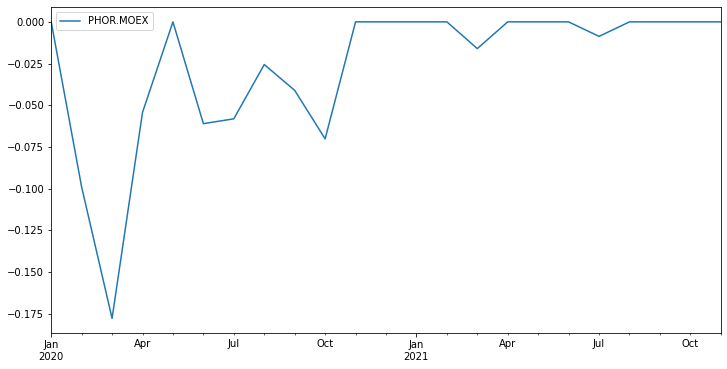

In [ ]:
x.drawdowns.plot();

See the dividend yield history for all the assets in the list.

In [ ]:

x.dividends.resample("Y").sum().plot(kind='bar');

AttributeError: ignored

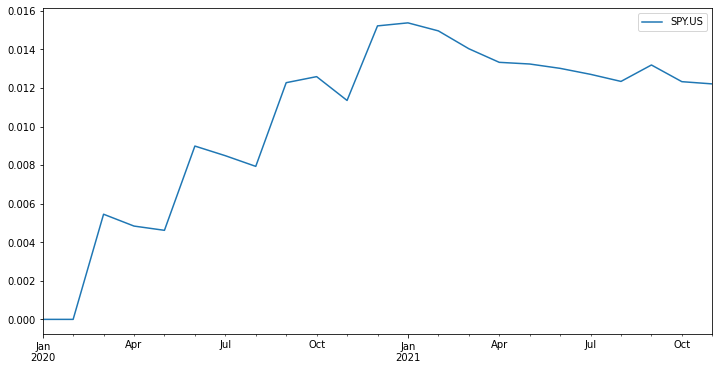

In [ ]:
x.assets_dividend_yield.plot()

_describe_ method shows all the main parameters (risk metrics, rate of return etc.) for the list of assets.

In [ ]:
x.describe(years=[1, 10])  # You can specify the period or leave the default: 1, 5 and 10 years

,property,period,DRW.US,inflation
0,Compound return,YTD,0.0196435,0.0531915
1,CAGR,1 years,0.108461,0.0539283
2,CAGR,10 years,NaN,NaN
3,CAGR,"1 years, 9 months",-0.0829792,0.0380513
4,Dividend yield,LTM,0.0808741,NaN
5,Risk,"1 years, 9 months",0.210914,NaN
6,CVAR,"1 years, 9 months",0.157218,NaN
7,Max drawdowns,"1 years, 9 months",-0.261756,NaN
8,Max drawdowns dates,"1 years, 9 months",2020-03,NaN
9,Inception date,None,2007-07,2020-01


### Correlation Matrix

If you need to check the correlation (or covariance) between assets returns, it's easy to use native Pandas functions.

Monthly rate of return time series are available with `.assets_ror` property:

In [ ]:
x.assets_ror

,DRW.US
Date,
2020-01,-0.0472
2020-02,-0.0489
2020-03,-0.2238
2020-04,0.0581
2020-05,-0.0163
2020-06,0.0391
2020-07,0.0031
2020-08,0.0484
2020-09,-0.0310


The correlation matrix is obtained by `x.ror.corr()`

In [ ]:
x.assets_ror.corr()

,DRW.US
DRW.US,1.0


Covariance matrix:

In [ ]:
x.assets_ror.cov()

,DRW.US
DRW.US,0.004054


Rolling correlation with the benchmark is useful to see the correlation patterns for shorter periods.  
The benchmark (index) should be on the first place in the AssetList (SPY.US in this example).

In [ ]:
x.index_rolling_corr(window=12*5).plot()

ValueError: ignored

## Basic portfolio methods

Lets create a portfolio with 3 assets and base currency USD. We need to specify weigts.

In [ ]:
tickers = ['VNQ.US', 'DBXD.XETR', 'MCFTR.INDX']  # we can create lists of assets and portfolio containing general type of assets and **indexes**
w = [0.5, 0.25, 0.25]
currency = 'USD'

In [ ]:
y = ok.Portfolio(tickers, ccy=currency, weights=w)
y

In [ ]:
y.table

Portfolio has the same property `.wealth_index` (accumulated return) as AssetList objects.

In [ ]:
y.wealth_index.plot();

### Risk metrics

You can use risk(volatility or standard deviation), semideviation, max drawdown, var and cvar metrics.

In [ ]:
y.risk_annual

In [ ]:
y.semideviation_annual

In [ ]:
y.get_var_historic(level=1)

In [ ]:
y.get_cvar_historic(level=5)

In [ ]:
y.drawdowns.min()

... another useful rist metric is max drawdown recovery period - `.recovery_period`.  
The longest recovery period for the portfolio assets value is returned.

In [ ]:
y.recovery_period / 12  # years

`.describe` shows main properties for the portfolio in different trailing periods.

In [ ]:
y.describe()

### Forecasting return

Monte Carlo forecast for normal distrubution.  
`.plot_forecast_monte_carlo` plots N random wealth indexes according to given return distribution.

In [ ]:
y.plot_forecast_monte_carlo(distr='norm', years=5, n=20)

For normal distribution it's easy to see forecasted accumulated return for a given set of percentiles.

In [ ]:
y.plot_forecast(years=5, today_value=1000, percentiles=[10,50,90]);  # lognormal or historical distribution can be used with "distr" argument

**More examples of forecasting portfolio perfomance are available in [07 forecasting.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/07%20forecasting.ipynb).**